In [90]:
# The program converts 2D image to sparse representation in Wavelet domain

In [99]:
import pywt
import cv2 as cv
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [100]:
def soft_threshold(signal, threshold):
    """
    Function returns soft thresholding output of signal
    Arguments 
    signal is an n dimensional array
    threshold is a constant
    
    Output
    array obtained on soft thresholding of signal
    """
    below_threshold = abs(signal) < threshold
    signal[below_threshold] = 0
    signal = signal - np.sign(signal) * threshold
    return signal

In [111]:
def main():
    #Variables_dict contains all the variables in the .mat file
    variables_dict = scipy.io.loadmat('task2.mat')
    
    #a,b,c,d are arrays representing wavelet coefficients
    a,(b,c,d) = pywt.dwt2(variables_dict['Image'], 'Haar', mode = 'symmetric')
    
    threshold = 0.4
    
    sparse_a = soft_threshold(a, threshold)
    sparse_b = soft_threshold(b, threshold)
    sparse_c = soft_threshold(c, threshold)
    sparse_d = soft_threshold(d, threshold)
    
    #Combining the wavelet coefficients into one array
    sparse_vector = np.hstack((np.vstack((sparse_a, sparse_c)), np.vstack((sparse_b, sparse_d))))
    return sparse_vector

[[ 0.1  0.1  0.  -0.1 -0.1  0. ]
 [ 0.1  1.1  0.  -0.1 -0.1  0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [-0.1 -0.1  0.   0.1  0.1  0. ]
 [-0.1  0.1  0.   0.1  0.1  0. ]
 [ 0.   0.   0.   0.   0.   0. ]]


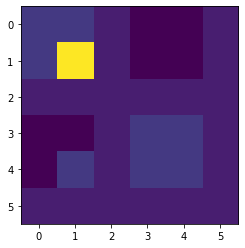

In [112]:
sparse_vector = main()
print(sparse_vector)
plt.imshow(sparse_vector)